 Continious missing data

Missing completely at random

In [1]:
import pandas as pd

In [2]:
a=pd.read_csv("C:\\Users\\vasan\\OneDrive\\Documents\\titanic.csv")

In [3]:
df=pd.DataFrame(a)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df[df['Fare'].isnull()]  #missing at random there is no relationship here

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


 Missing data at not random:Sysmetatic missing values

In [11]:
import numpy as np
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)

In [13]:
df['Cabin_null'].mean()   ## percentage of null values

0.7822966507177034

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [16]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.823308
1    0.710526
Name: Cabin_null, dtype: float64

Missing at random
1.men hide their salary
2.womem hide their age

In [17]:
#### ALL the techniques for handling missing values

1. mean/median/mode replacement
2.Random sample imputation
3.capturing the nan values with new variable
4.end of distribution imputation
5.arbitraty imputation
6.Frequent category imputation


In [20]:
# Mean/Median/Mode imputation
## when should we apply this?
## mean/median imputaion has assumption that data are missing completely at random(MCAR)
### we slove this by replacing the nan values by most frequent occuring

In [21]:
a=pd.read_csv("C:\\Users\\vasan\\OneDrive\\Documents\\titanic.csv",usecols=['Age','Fare','Survived'])

In [22]:
df1=pd.DataFrame(a)

In [23]:
df1.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [24]:
df1.isnull().mean()   ##percentage of null values

Survived    0.000000
Age         0.205742
Fare        0.002392
dtype: float64

In [25]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [26]:
median=df.Age.median()

In [27]:
median

27.0

In [30]:
impute_nan(df1,'Age',median)

In [31]:
df1

,Survived,Age,Fare,Age_median
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0
...,...,...,...,...
413,0,NaN,8.0500,27.0
414,1,39.0,108.9000,39.0
415,0,38.5,7.2500,38.5
416,0,NaN,8.0500,27.0


In [32]:
import matplotlib.pyplot as plt

<AxesSubplot: >

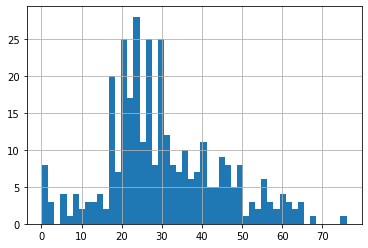

In [33]:
df.Age.hist(bins=50)

<AxesSubplot: ylabel='Density'>

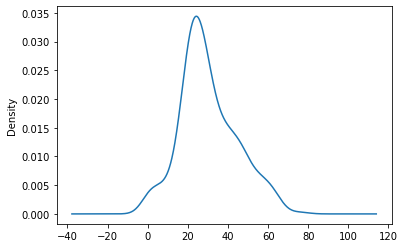

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)

In [36]:
## random sample imputation  consists of taking random observation  from the dataset we use this to replace the nan values
## when should it be used? it assumes that data are missing completely at random

  3. captuirng nan values with a new feature
  it works well if the data are not missing completely at random

In [38]:
df1

,Survived,Age,Fare,Age_median
0,0,34.5,7.8292,34.5
1,1,47.0,7.0000,47.0
2,0,62.0,9.6875,62.0
3,0,27.0,8.6625,27.0
4,1,22.0,12.2875,22.0
...,...,...,...,...
413,0,NaN,8.0500,27.0
414,1,39.0,108.9000,39.0
415,0,38.5,7.2500,38.5
416,0,NaN,8.0500,27.0


In [39]:
a=pd.read_csv("C:\\Users\\vasan\\OneDrive\\Documents\\titanic.csv",usecols=['Age','Fare','Survived'])
df2=pd.DataFrame(a)

In [40]:
df2

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875
...,...,...,...
413,0,NaN,8.0500
414,1,39.0,108.9000
415,0,38.5,7.2500
416,0,NaN,8.0500


In [41]:
df2['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [42]:
df2

,Survived,Age,Fare,Age_nan
0,0,34.5,7.8292,0
1,1,47.0,7.0000,0
2,0,62.0,9.6875,0
3,0,27.0,8.6625,0
4,1,22.0,12.2875,0
...,...,...,...,...
413,0,NaN,8.0500,1
414,1,39.0,108.9000,0
415,0,38.5,7.2500,0
416,0,NaN,8.0500,1


In [44]:
df2.head(6)

,Survived,Age,Fare,Age_nan
0,0,34.5,7.8292,0
1,1,47.0,7.0000,0
2,0,62.0,9.6875,0
3,0,27.0,8.6625,0
4,1,22.0,12.2875,0
5,0,14.0,9.2250,0


In [47]:
df2[df2['Age'].isnull()]

,Survived,Age,Fare,Age_nan
10,0,NaN,7.8958,1
22,1,NaN,31.6833,1
29,0,NaN,21.6792,1
33,1,NaN,23.4500,1
36,1,NaN,8.0500,1
...,...,...,...,...
408,1,NaN,7.7208,1
410,1,NaN,7.7500,1
413,0,NaN,8.0500,1
416,0,NaN,8.0500,1


In [49]:
df2.head(11)

,Survived,Age,Fare,Age_nan
0,0,34.5,7.8292,0
1,1,47.0,7.0000,0
2,0,62.0,9.6875,0
3,0,27.0,8.6625,0
4,1,22.0,12.2875,0
5,0,14.0,9.2250,0
6,1,30.0,7.6292,0
7,0,26.0,29.0000,0
8,1,18.0,7.2292,0
9,0,21.0,24.1500,0


In [50]:
df.Age.median()

27.0

In [53]:
df2['Age'].fillna(df2.Age.median(),inplace=True)

In [54]:
df2.head(12
        )

,Survived,Age,Fare,Age_nan
0,0,34.5,7.8292,0
1,1,47.0,7.0000,0
2,0,62.0,9.6875,0
3,0,27.0,8.6625,0
4,1,22.0,12.2875,0
5,0,14.0,9.2250,0
6,1,30.0,7.6292,0
7,0,26.0,29.0000,0
8,1,18.0,7.2292,0
9,0,21.0,24.1500,0


# End of distribution
taking the value from end of distribution we will replace with nan values

In [70]:
a=pd.read_csv("C:\\Users\\vasan\\OneDrive\\Documents\\titanic.csv",usecols=['Age','Fare','Survived'])
df3=pd.DataFrame(a)

In [71]:
 extreme=df3.Age.mean() + 3*df.Age.std()
print(extreme)

68.38389990044564


<AxesSubplot: >

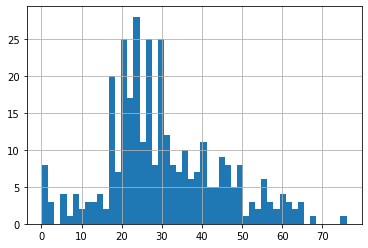

In [59]:
df1.Age.hist(bins=50)

C:\Users\vasan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Age'>

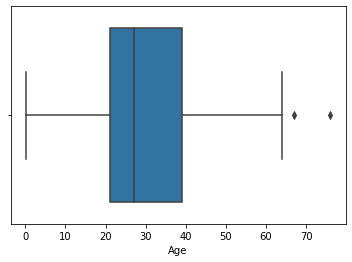

In [60]:
## checking outliers
import seaborn as sns
sns.boxplot('Age',data=df1)

In [72]:
def impute_nan(df3,variable,median,extreme):
    df3[variable+"_end-distribution"]=df3[variable].fillna(extreme)
    df3[variable].fillna(median,inplace=True)

In [73]:
df3.Age.median()

27.0

In [75]:
 impute_nan(df3,'Age',df3.Age.median(),extreme)

In [76]:
df3.head(12)

,Survived,Age,Fare,Age_end-distribution
0,0,34.5,7.8292,34.5000
1,1,47.0,7.0000,47.0000
2,0,62.0,9.6875,62.0000
3,0,27.0,8.6625,27.0000
4,1,22.0,12.2875,22.0000
5,0,14.0,9.2250,14.0000
6,1,30.0,7.6292,30.0000
7,0,26.0,29.0000,26.0000
8,1,18.0,7.2292,18.0000
9,0,21.0,24.1500,21.0000


<AxesSubplot: >

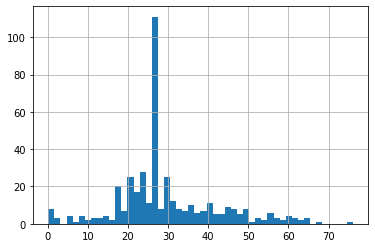

In [77]:
df3.Age.hist(bins=50)

In [ ]:
df3.Age_end-distribution.hist(bins=50)
##here outliers will be captured

# Arbitrary value imputation

it consists of replacing NAN values by an Arbitrary value

In [82]:
a=pd.read_csv("C:\\Users\\vasan\\OneDrive\\Documents\\titanic.csv",usecols=['Age','Fare','Survived'])
df4=pd.DataFrame(a)

In [83]:
df4.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [87]:
def impute_nan(df4,variable):
    df4[variable+"hundred"]=df4[variable].fillna(100)
    df4[variable+"zeroes"]=df4[variable].fillna(0)

In [88]:
impute_nan(df4,'Age')

In [89]:
df4.head(12)

,Survived,Age,Fare,Agehundred,Agezeroes
0,0,34.5,7.8292,34.5,34.5
1,1,47.0,7.0000,47.0,47.0
2,0,62.0,9.6875,62.0,62.0
3,0,27.0,8.6625,27.0,27.0
4,1,22.0,12.2875,22.0,22.0
5,0,14.0,9.2250,14.0,14.0
6,1,30.0,7.6292,30.0,30.0
7,0,26.0,29.0000,26.0,26.0
8,1,18.0,7.2292,18.0,18.0
9,0,21.0,24.1500,21.0,21.0
